# 3 Analyse exploratoire des donnees ´
Cette phase consiste a : `
1. identifier la variable cible qui doit ˆetre pr´edite. Dans ce projet la variable pr´edite est la variation
journali`ere des prix des futures (la colonne TARGET dans les datasets Y train et Y test).
2. effectuer une analyse exploratoire des donn´ees (EDA, Exploratory Data Analysis) par une vari´et´e de
graphiques et de statistiques en suivant les ´etapes suivantes :

— Faire un aperc¸u des variables en examinant leur type, leur distribution, leur plage de valeurs et leur
signification

— Examiner la relation entre les variables caract´eristiques et la variable cible en utilisant des techniques
graphiques telles que des histogrammes, des diagrammes en boˆıte et des graphiques de dispersion

— Construire une matrice de corr´elation entre les variables

— Interpr´eter les r´esultats de l’EDA pour identifier les caract´eristiques importantes qui influencent le
prix de l’´electricit´e et les relations significatives entre les variables

Pour bien maˆıtriser cette phase, je vous invite a consulter le lien suivant : ` Python for Data Science: Implementing
Exploratory Data Analysis (EDA) and K-Means Clustering
https://medium.com/@aziszamcalvin/python-for-data-science-implementing-exploratory-data-analysis-eda-and-k-means-clustering-bcf1d24adc12

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler

# Analyse de la Variable Cible
`TARGET` : Variation journalière du prix de futures d'électricité (maturité 24h)

In [2]:
raw_data_x = pd.read_csv("data/Data_X.csv", index_col='ID')
raw_dataNew_x = pd.read_csv("data/DataNew_X.csv", index_col='ID')
raw_data_y = pd.read_csv("data/Data_Y.csv", index_col='ID')

In [3]:
data_xy = pd.merge(raw_data_x, raw_data_y, on='ID').copy().dropna()

In [4]:
data_fr = data_xy

<AxesSubplot:>

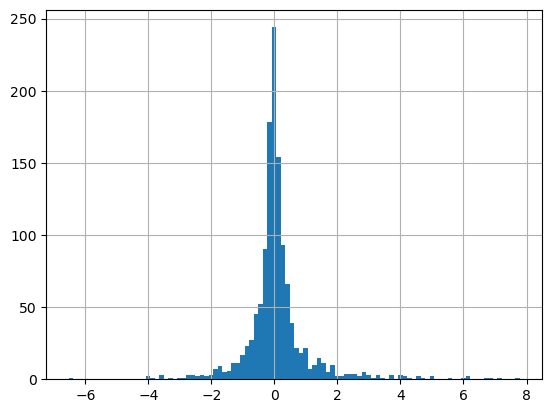

In [5]:
data_fr['TARGET'].hist(bins=100)

In [6]:
data_fr['TARGET'].describe().loc[['mean', 'std', 'min', 'max']]

mean    0.093677
std     1.071405
min    -6.519268
max     7.786578
Name: TARGET, dtype: float64

Cette histogramme montre la distribution de la des variations journalieres du prix des futures dans nos données.
En effet, c'est une variation sa moyenne est de 0. 
Il y a un ecart moyen avec la moyenne de 1.
Cependant on observe des valeurs extremes allant de dans les negatifs jusqu'a -6,5, et dans les positifs jusqu'a 7,7.

## Standardisation de la variable cible

In [7]:
normalized_target = RobustScaler().fit_transform(data_fr[['TARGET']])

In [8]:
normalized_target = pd.DataFrame(normalized_target, columns=['TARGET'])

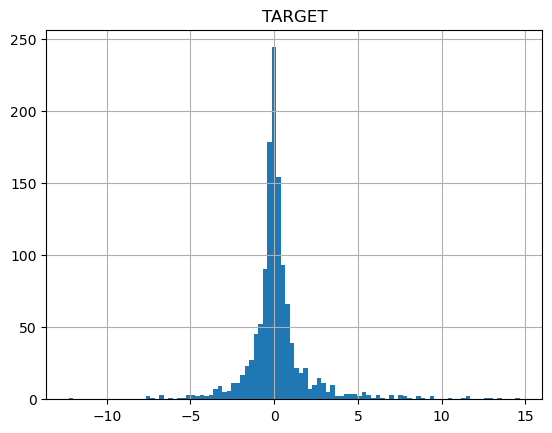

In [9]:
# plt.hist(normalized_target, bins=100);
normalized_target.hist(bins=100);

In [10]:
normalized_target.describe().loc[['mean', 'std', 'min', 'max']]

,TARGET
mean,0.186125
std,2.016768
min,-12.261807
max,14.666919


# Analyse Exploratoire des Données

Le but de la partie EDA (Exploratory Data Analysis) en machine learning est d'explorer et d'analyser les données afin de mieux comprendre leur structure, leurs caractéristiques et leurs relations. Cela permet aux scientifiques des données et aux analystes de prendre des décisions éclairées sur les méthodes de prétraitement des données, les techniques d'apprentissage automatique à utiliser, les variables à inclure dans le modèle et les hypothèses à tester.

Plus précisément, l'EDA comprend des tâches telles que la visualisation des données pour identifier des schémas et des tendances, la recherche de valeurs aberrantes et de données manquantes, la corrélation entre les variables et la compréhension de la distribution des données. Cela aide à déterminer si les données sont appropriées pour l'apprentissage automatique et si des ajustements doivent être apportés pour améliorer la qualité des données et la performance du modèle.

En bref, l'EDA est une étape cruciale dans le processus de modélisation de l'apprentissage automatique car elle permet de mieux comprendre les données sur lesquelles le modèle sera formé, ce qui conduit à une meilleure sélection des caractéristiques, des méthodes de prétraitement de données et des techniques d'apprentissage automatique pour améliorer la qualité du modèle et la performance des prédictions.

# Analyse Univariée 

## Histogrammes

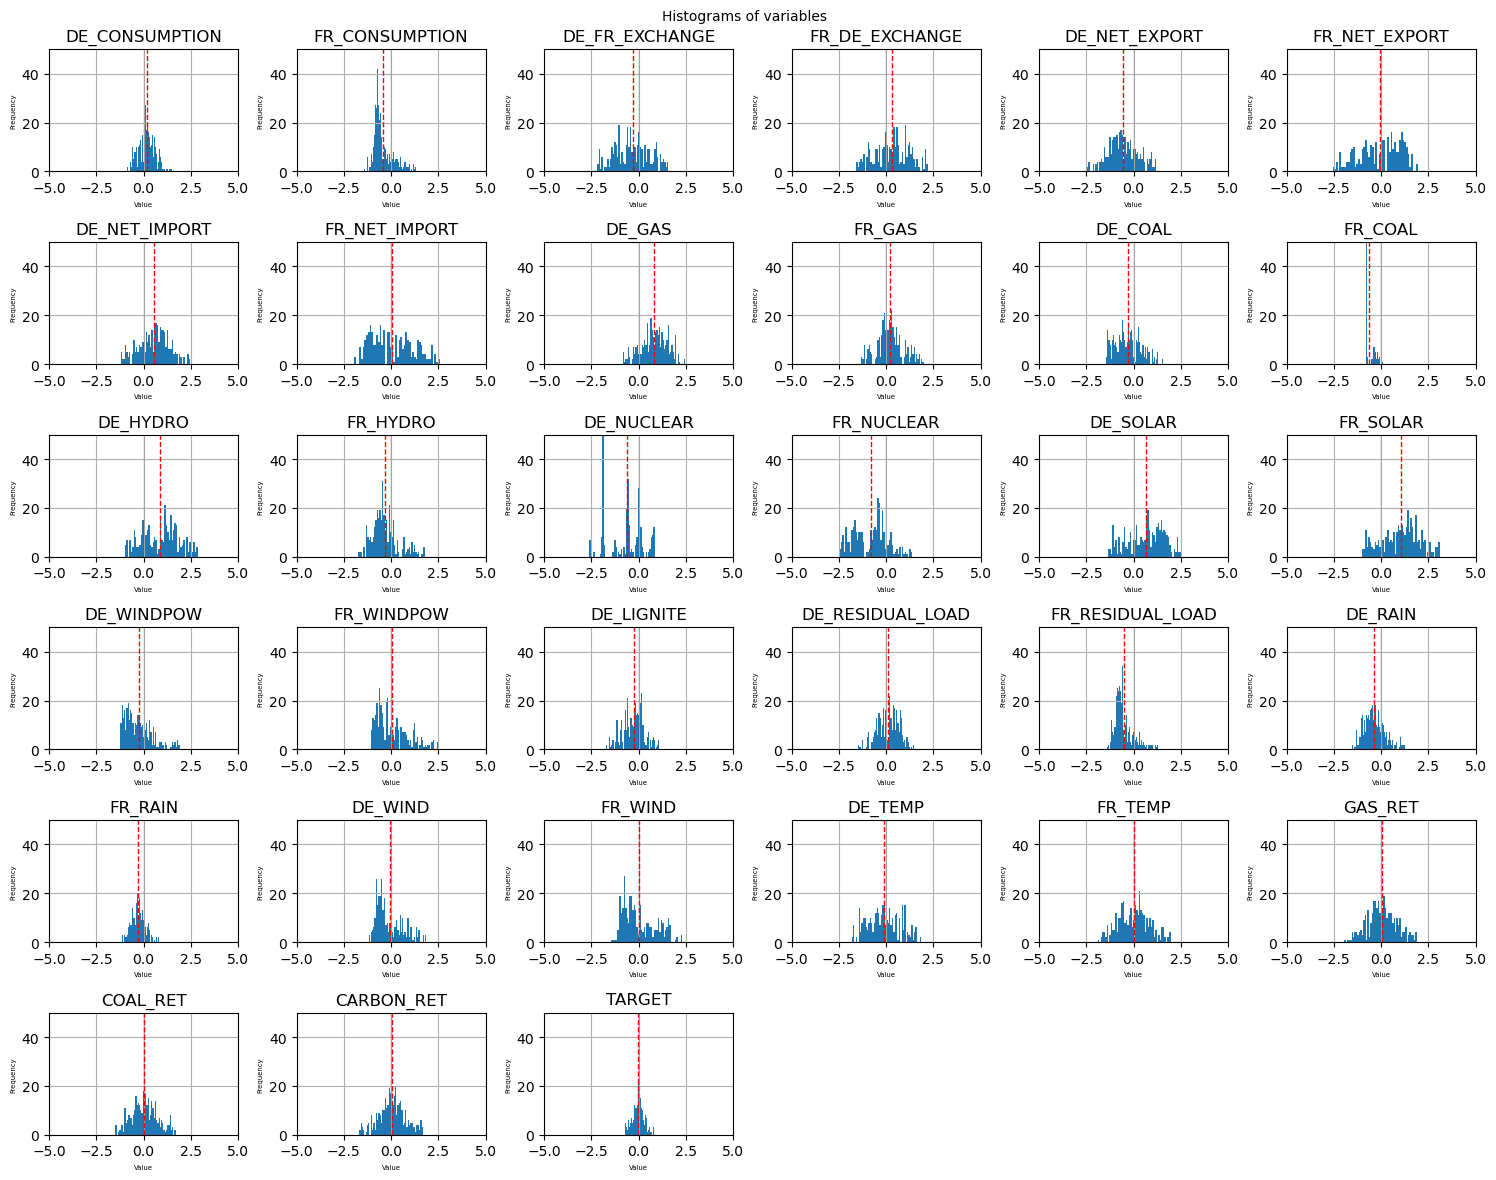

In [26]:
title_fontsize = 10
axes_fontsize = 5
numeric_cols = data_xy.select_dtypes(include=['float']).columns
nrows = 6
ncols = 6
x_lim = 5

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows*2))

for i, column in enumerate(numeric_cols):
    row_idx = i // ncols
    col_idx = i % ncols
    ax = axes[row_idx, col_idx]  
    data_fr[column].hist(bins=50, ax=ax)
    ax.set_title(column)
    ax.set_xlabel("Value", fontsize=axes_fontsize)
    ax.set_ylabel("Frequency", fontsize=axes_fontsize)
    ax.set_ylim([0, 50]) 
    ax.set_xlim([-x_lim, x_lim])
    ax.axvline(x=0, color='k', linestyle='-', linewidth=0.1) 
    ax.axvline(x=data_fr[column].mean(), color='r', linestyle='--', linewidth=1) 

# If there are any subplots left over, delete them
if len(numeric_cols) < nrows*ncols:
    for i in range(len(numeric_cols), nrows*ncols):
        fig.delaxes(axes.flatten()[i])  

plt.suptitle("Histograms of variables", fontsize=title_fontsize)
plt.tight_layout()

## Diagrammes moustache

(-4.0, 4.0)

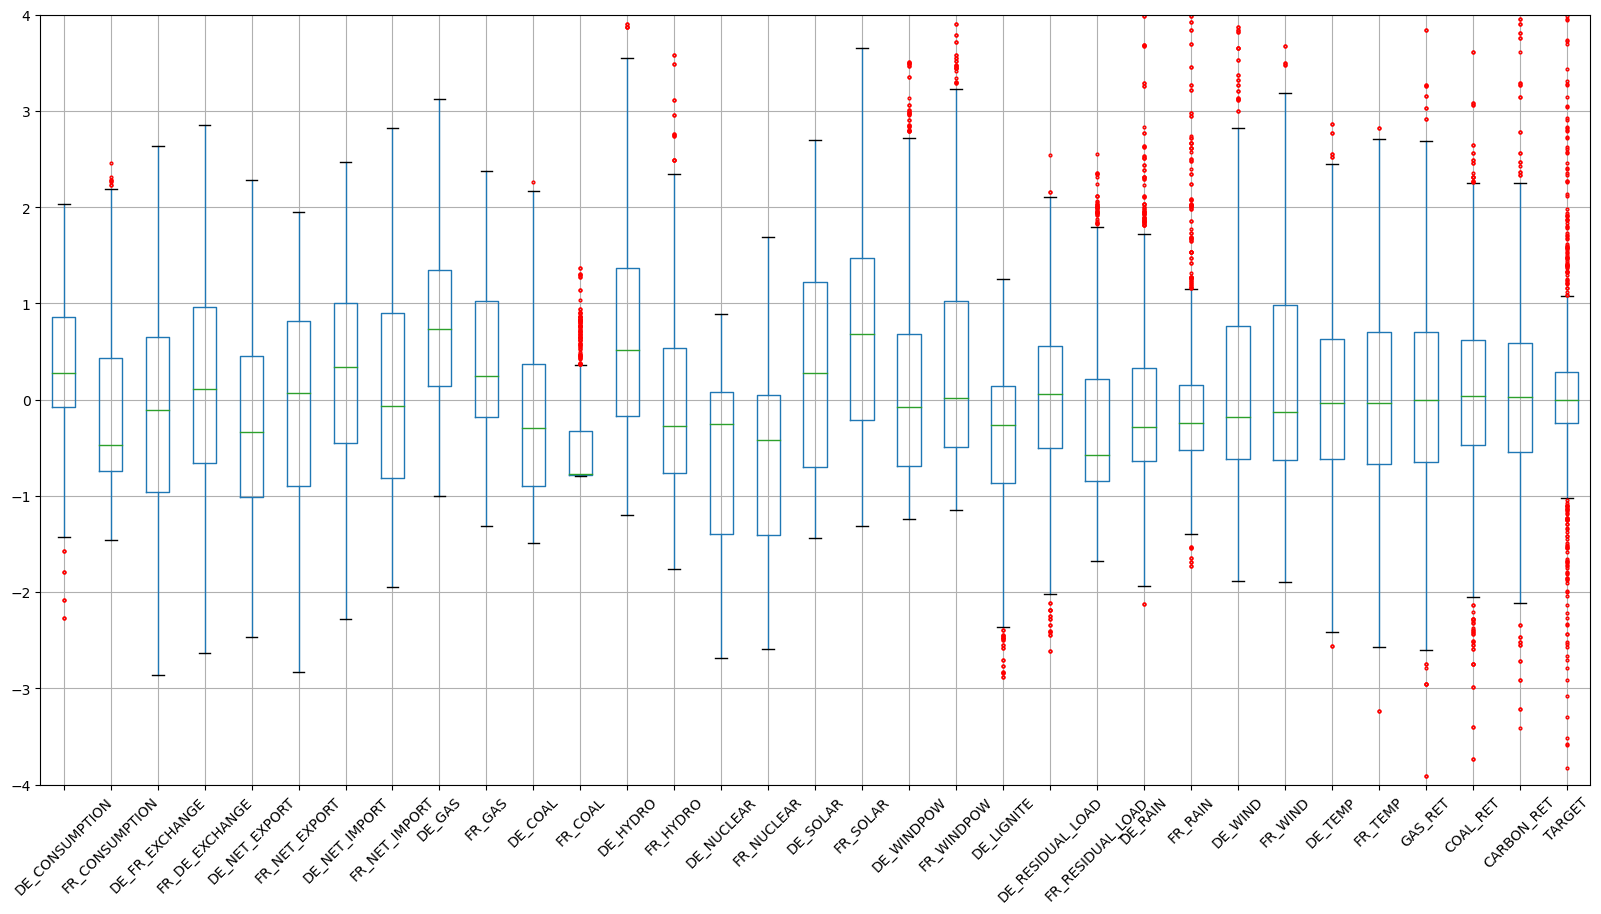

In [12]:
flierprops = {
    'markersize': 2,
    'markeredgecolor': 'r',
}

y_lim = 4

data_fr.boxplot(column=numeric_cols.tolist(), figsize=(20,10), flierprops=flierprops)
plt.xticks(rotation=45, fontsize=10);
plt.ylim([-y_lim, y_lim])

In [13]:
# Calculate the IQR for each numeric column
Q1 = data_fr[numeric_cols].quantile(0.25)
Q3 = data_fr[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

coef = 1
# Remove the outliers
data_fr = data_fr[~((data_fr[numeric_cols] < (Q1 - coef * IQR)) |(data_fr[numeric_cols] > (Q3 + coef * IQR))).any(axis=1)]


(-4.0, 4.0)

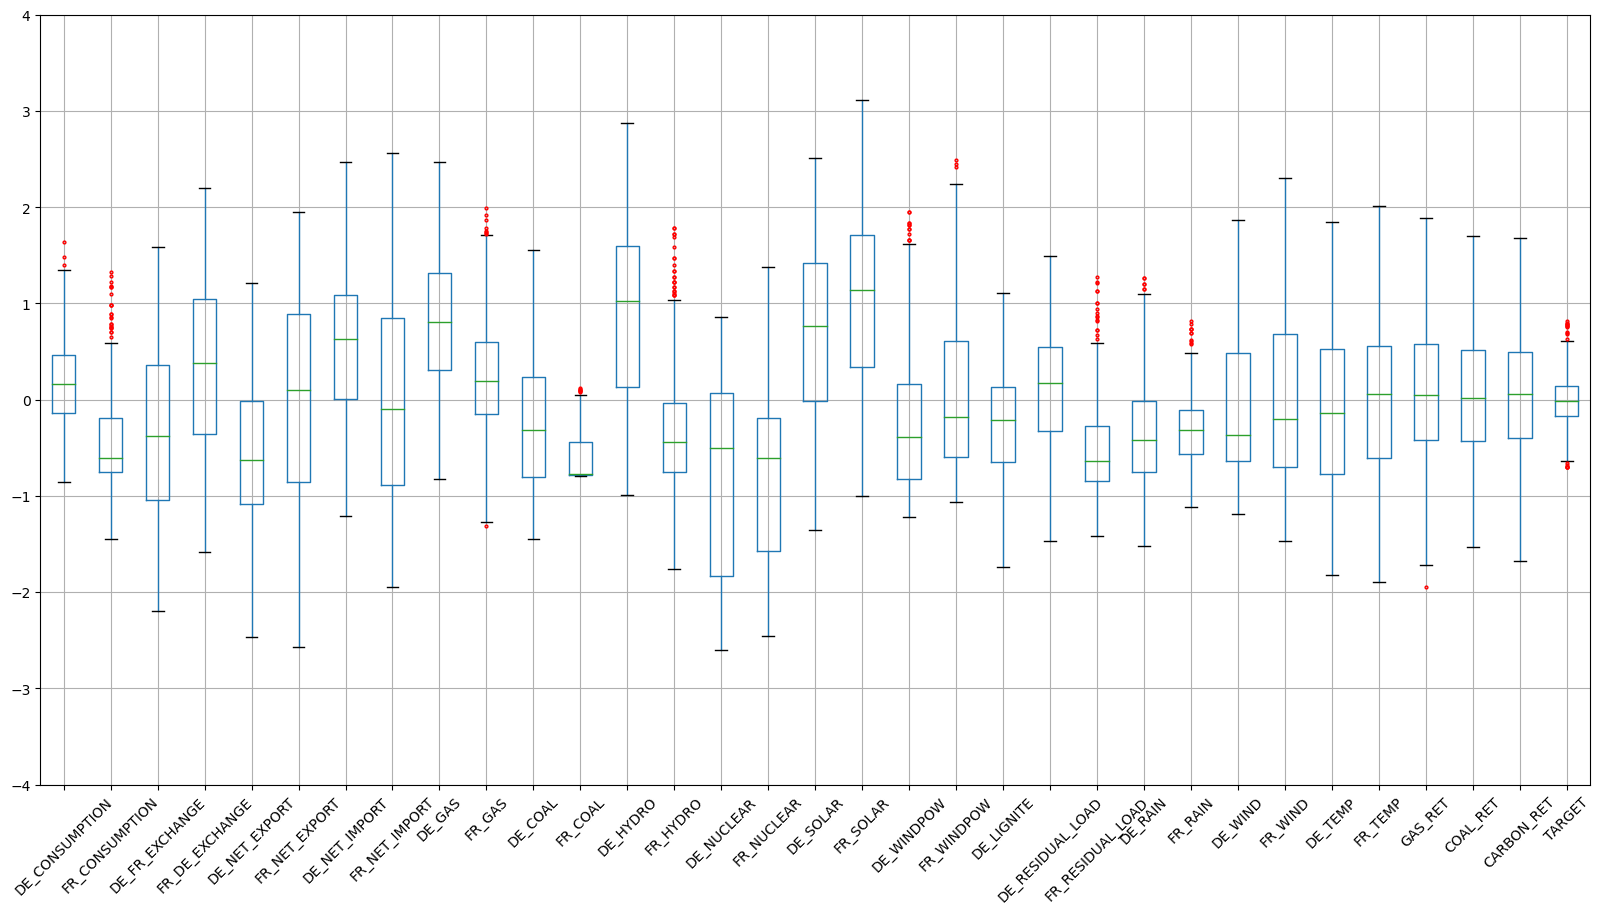

In [14]:
flierprops = {
    'markersize': 2,
    'markeredgecolor': 'r',
}

y_lim = 4

data_fr.boxplot(column=numeric_cols.tolist(), figsize=(20,10), flierprops=flierprops)
plt.xticks(rotation=45, fontsize=10);
plt.ylim([-y_lim, y_lim])

# Analyse Bivariée

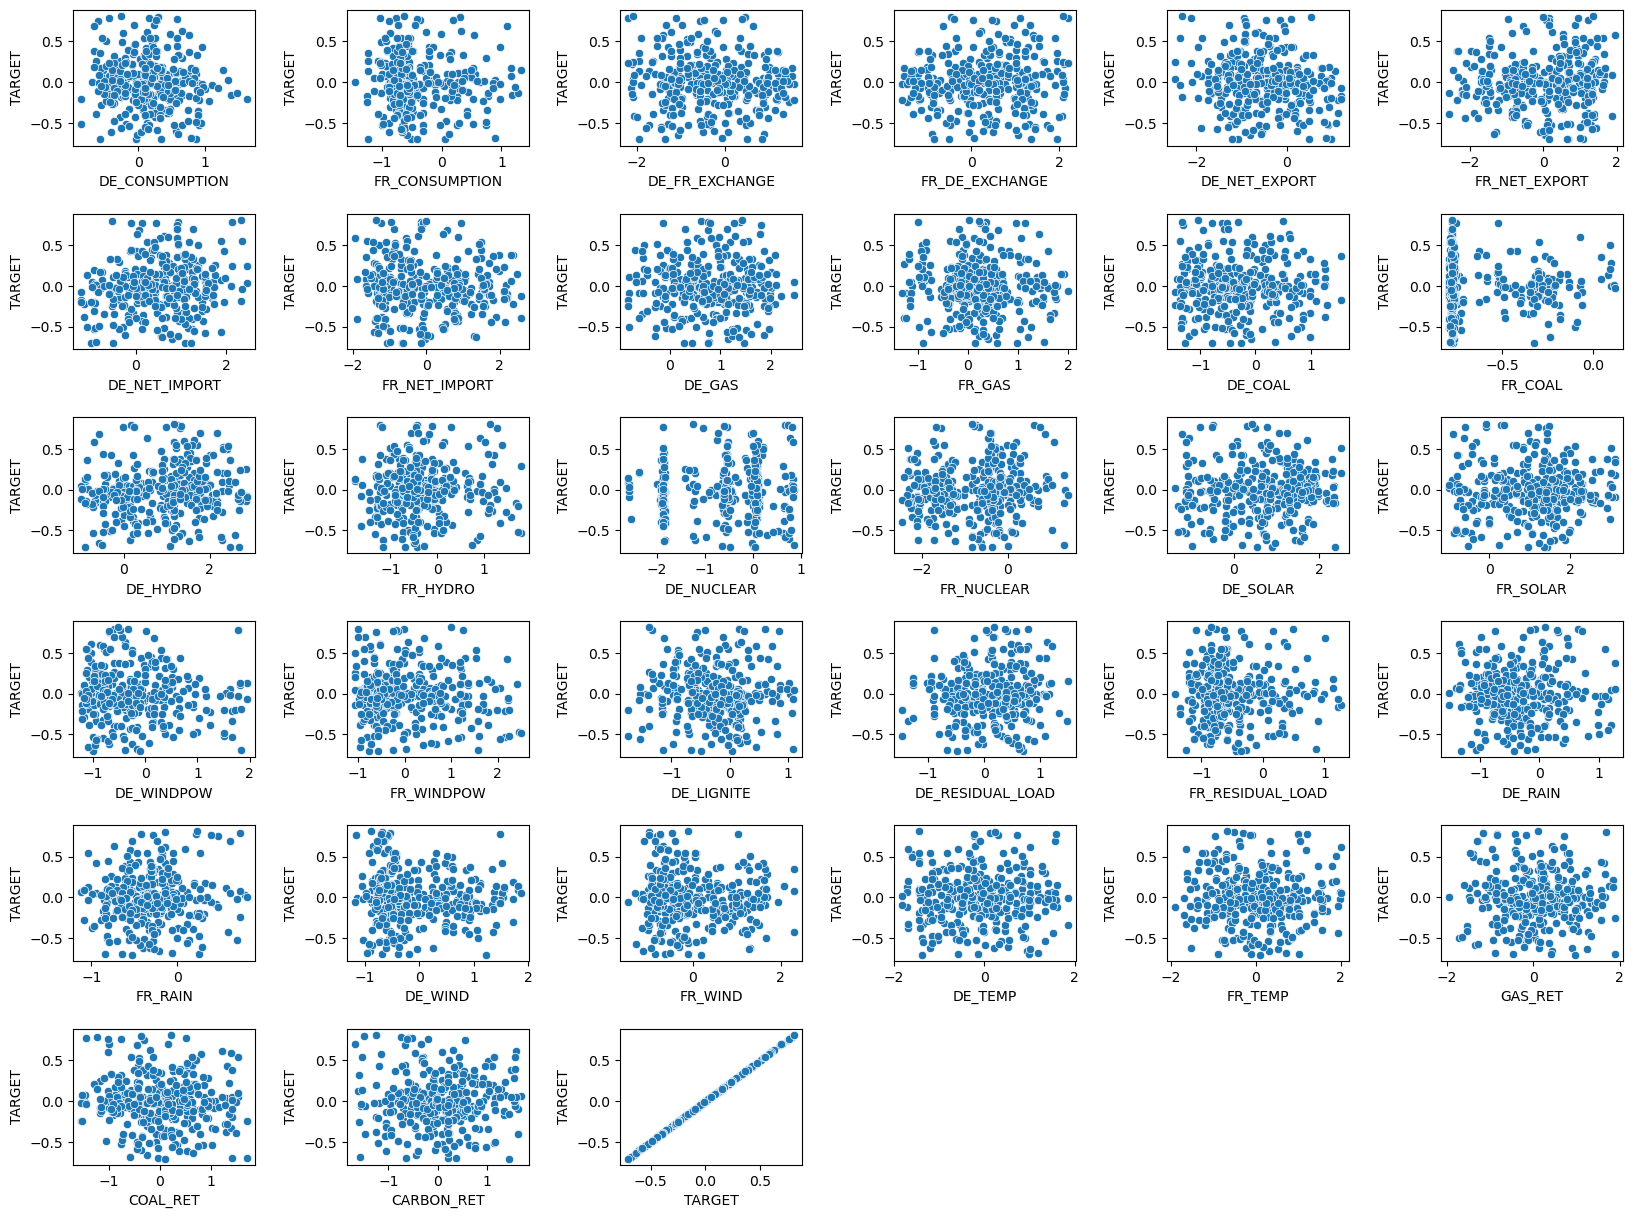

In [15]:
fig,axes = plt.subplots(6,6, figsize=(20,15))

for i, column in enumerate(numeric_cols):
    row_idx = i // ncols
    col_idx = i % ncols
    ax = axes[row_idx, col_idx]
    sns.scatterplot(x=data_fr[column], y=data_fr['TARGET'], ax=ax)
plt.subplots_adjust(hspace=0.5, wspace=0.5)

if len(numeric_cols) < nrows*ncols:
    for i in range(len(numeric_cols), nrows*ncols):
        fig.delaxes(axes.flatten()[i]) 

<AxesSubplot:>

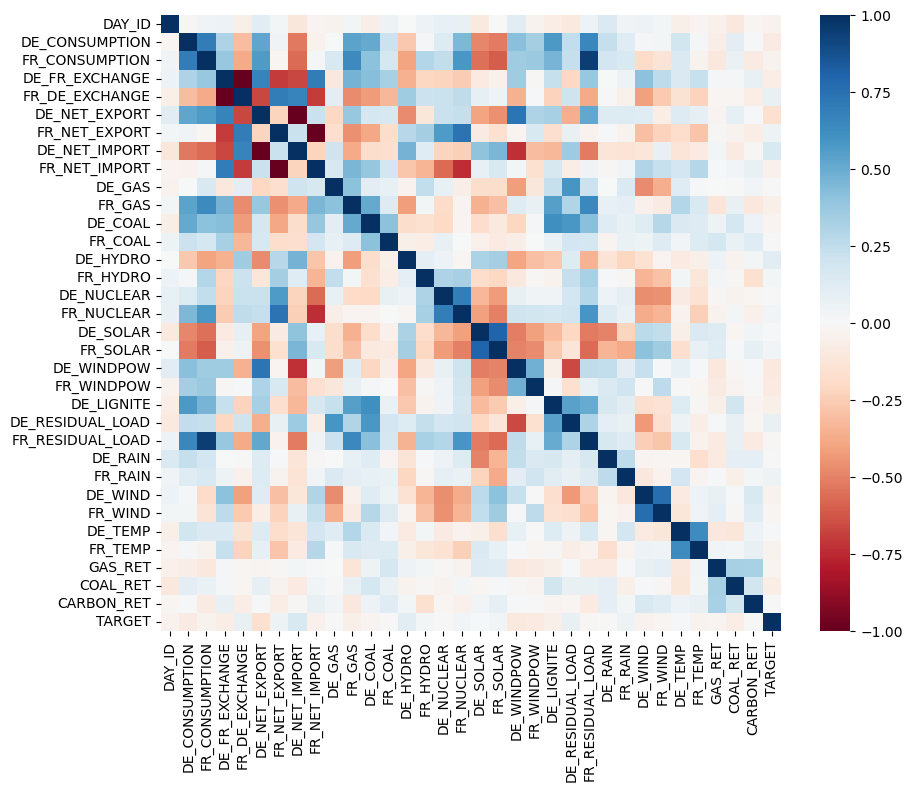

In [16]:
plt.figure(figsize=(10, 8)) 
sns.heatmap(data_fr.corr(), cmap="RdBu")

In [17]:
N = 20
abs_corr = data_fr.corr().abs()
top_corr = abs_corr.unstack().sort_values(ascending=False).drop_duplicates()
top_corr = top_corr[top_corr != 1]
top_corr = top_corr.head(N)
print(top_corr)

FR_CONSUMPTION    FR_RESIDUAL_LOAD    0.950761
DE_SOLAR          FR_SOLAR            0.798856
FR_WIND           DE_WIND             0.761850
FR_NET_EXPORT     FR_NUCLEAR          0.738063
DE_NET_EXPORT     DE_WINDPOW          0.733957
DE_CONSUMPTION    FR_CONSUMPTION      0.702535
FR_NET_EXPORT     FR_DE_EXCHANGE      0.701947
FR_NUCLEAR        DE_NUCLEAR          0.694773
DE_FR_EXCHANGE    DE_NET_IMPORT       0.668546
DE_WINDPOW        DE_RESIDUAL_LOAD    0.657537
FR_RESIDUAL_LOAD  DE_CONSUMPTION      0.652842
FR_GAS            FR_RESIDUAL_LOAD    0.640755
FR_CONSUMPTION    FR_GAS              0.632815
DE_TEMP           FR_TEMP             0.628936
DE_LIGNITE        DE_COAL             0.613157
FR_SOLAR          FR_CONSUMPTION      0.602138
DE_GAS            DE_RESIDUAL_LOAD    0.592868
FR_RESIDUAL_LOAD  FR_NUCLEAR          0.589519
DE_RESIDUAL_LOAD  DE_COAL             0.582576
FR_CONSUMPTION    FR_NUCLEAR          0.579790
dtype: float64
